In [141]:
# Import everything

In [142]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

# Load the dataset from csv
dataset = pd.read_csv('weather.csv')

---------------- PLOTTING CORRELATION COEFFICIENT MATRIX --------------


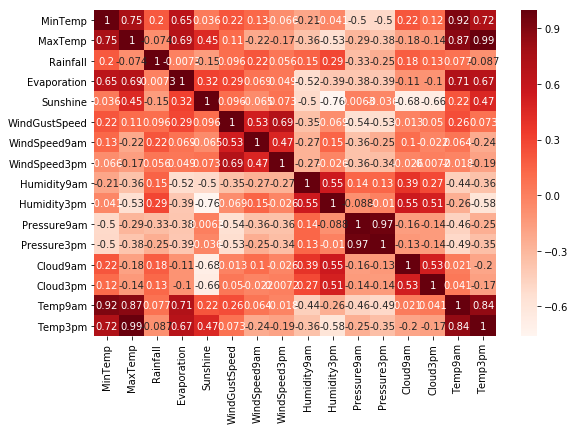

In [143]:
print('---------------- PLOTTING CORRELATION COEFFICIENT MATRIX --------------')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(9,6))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

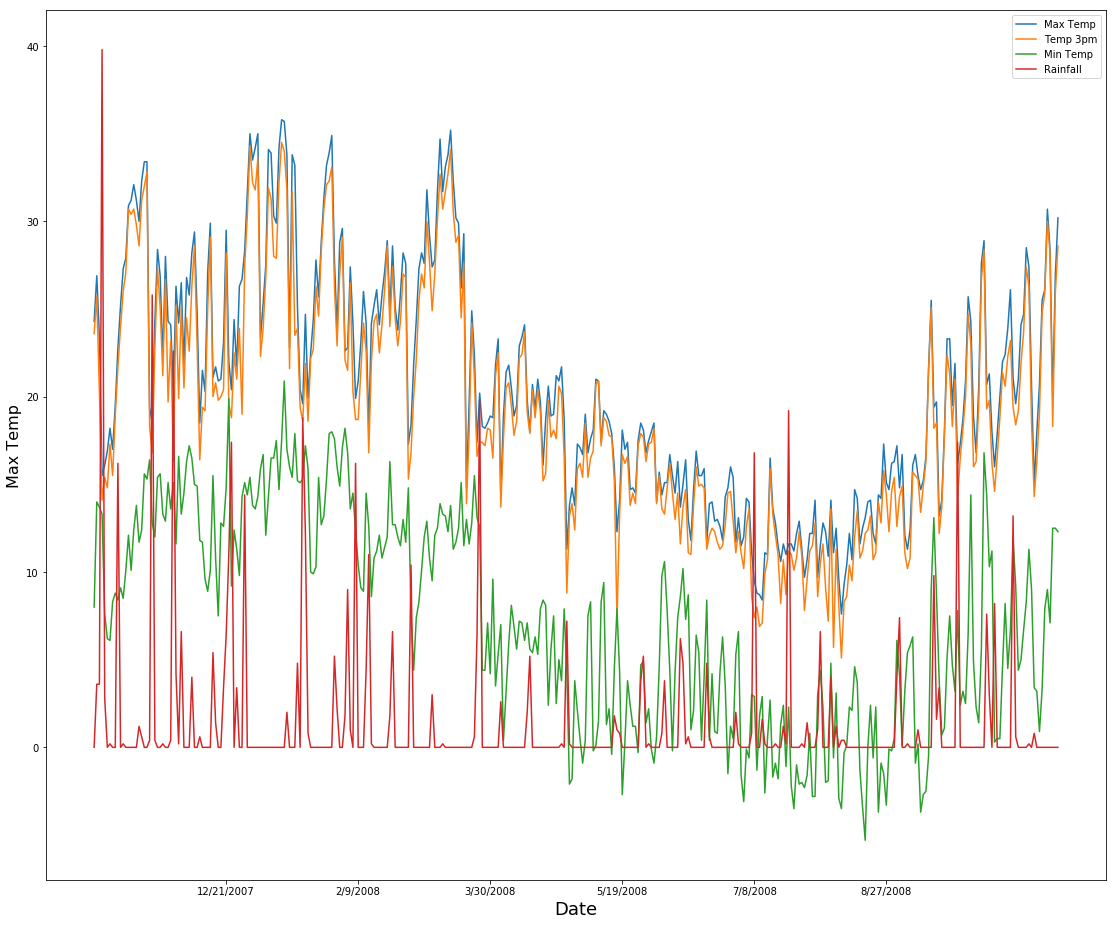

In [144]:
# Why Temp3pm and MaxTemp is 99% correlated. Lets plot and analyze. 
# We'll see the pattern of Temp3pm and MaxTemp
# Training a model ussuallt removing correlated features, we will end up using maxtemp and mintemp for rainfall.

maxtemp_df = dataset[['MaxTemp']]
mintemp_df = dataset[['MinTemp']]
temp3pm_df = dataset[['Temp3pm']]
rainfall_df = dataset[['Rainfall']]
date_df = dataset['Date']

plt.figure(figsize=(19,16))
plt.plot(date_df, maxtemp_df, label='Max Temp')
plt.plot(date_df, temp3pm_df, label='Temp 3pm')
plt.plot(date_df, mintemp_df, label='Min Temp')
plt.plot(date_df, rainfall_df, label='Rainfall')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Max Temp', fontsize=16)
plt.legend()
plt.xticks([50, 100,150, 200, 250, 300])
# plt.yticks([1, 2, 3, 4, 5])
plt.show()

In [145]:
print('---------------- DATA PREPARATION --------------')
print('Top 5 per columns: \n', dataset.head())
print('Rows and columns: ', dataset.shape)

X = dataset[['MinTemp', 'MaxTemp']]
y = dataset['Rainfall']  # Target Variable to predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---------------- DATA PREPARATION --------------
Top 5 per columns: 
         Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007      7.6     16.1       2.8          5.6      10.6   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           30.0           6.0            20           68           29   
1           39.0           4.0            17           80           36   
2           85.0           6.0             6           82           69   
3           54.0          30.0            24           62           56   
4           50.0          20.0            28           68           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0  

In [146]:
print('---------------- TRAINING THE MODEL --------------')
model = LinearRegression()
model.fit(X_train, y_train)
print('Model score: ', model.score(X_train, y_train))
# We generally want our model to have 50% score and above. We can adjust (remove/add) features in X dataset.

---------------- TRAINING THE MODEL --------------
Model score:  0.1863696269615701


In [147]:
#To retrieve the intercept:
print("Intercept: ", model.intercept_)
#For retrieving the slope:
print("Coef Slope: ", model.coef_)

Intercept:  5.155094840115063
Coef Slope:  [ 0.45686623 -0.34173512]


In [148]:
print('---------------- EVALUATING THE MODEL --------------')
print("Actual vs predicted result of test dataset:\n ")
y_pred = model.predict(X_test)
# print(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

---------------- EVALUATING THE MODEL --------------
Actual vs predicted result of test dataset:
 
     Actual  Predicted
106     0.0   1.477525
259     0.0   0.402782
45      5.4   5.025910
26      0.2   3.644896
78      0.0   5.082379


In [149]:
print('------------------- PREDICT NEW DATA -----------------------------')
new_min_temp = 14
new_max_temp = 25
new_data = [[new_min_temp, new_max_temp]]
print('Predicted Rainfall if min temp is {} and max temp is {}: '.format(new_min_temp, new_max_temp), model.predict(new_data)[0])

------------------- PREDICT NEW DATA -----------------------------
Predicted Rainfall if min temp is 14 and max temp is 25:  3.007844129748852


In [150]:
print('------------------- PREDICT ANOTHER NEW DATA -----------------------------')
new_min_temp = 17
new_max_temp = 30
new_data = [[new_min_temp, new_max_temp]]
print('Predicted Rainfall if min temp is {} and max temp is {} is: '.format(new_min_temp, new_max_temp), model.predict(new_data)[0])

------------------- PREDICT ANOTHER NEW DATA -----------------------------
Predicted Rainfall if min temp is 17 and max temp is 30 is:  2.669767233647166
